FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    6/6/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


WC_ABS_GoM21Su_ID2122 - is fucked up 

!STOPED ON PW_ID2123!


In [25]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM22SU/EXP_3/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/EXPERIMENTS_GOM22SU/EXP_3.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/EXPERIMENTS_GOM22SU/EXP_3.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/EXPERIMENTS_GOM22SU/EXP_3.csv'
files

['../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-1_Absorbance__0__18.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-1_Absorbance__1__19.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-1_Absorbance__2__20.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-2_Absorbance__0__21.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-2_Absorbance__1__22.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T0-2_Absorbance__2__23.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-1_Absorbance__0__42.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-1_Absorbance__1__43.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-1_Absorbance__2__44.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-2_Absorbance__0__45.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-2_Absorbance__1__46.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224862-T1-2_Absorbance__2__47.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224863-T0-1_Absorbance__0__24.txt',
 '../../../CDOM_DATA/GOM22SU/EXP_3\\224863-T0-1_Absorbance__1__2

In [26]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .0489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM21SU thats not PW
#X = .04875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

X = .01

#X = .1


PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [27]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    #xi = np.arange(189,523,1)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [28]:
#EDIT HERE
n = 6 # how many underscore breaks 
stri = 3 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,224862-T0-1_Absorbance__0__18.txt,224862-T0-1_Absorbance__1__19.txt,224862-T0-1_Absorbance__2__20.txt,224862-T0-2_Absorbance__0__21.txt,224862-T0-2_Absorbance__1__22.txt,224862-T0-2_Absorbance__2__23.txt,224862-T1-1_Absorbance__0__42.txt,224862-T1-1_Absorbance__1__43.txt,224862-T1-1_Absorbance__2__44.txt,224862-T1-2_Absorbance__0__45.txt,...,224865-T0-1_Absorbance__2__38.txt,224865-T0-2_Absorbance__0__39.txt,224865-T0-2_Absorbance__1__40.txt,224865-T0-2_Absorbance__2__41.txt,224865-T1-1_Absorbance__0__60.txt,224865-T1-1_Absorbance__1__61.txt,224865-T1-1_Absorbance__2__62.txt,224865-T1-2_Absorbance__0__63.txt,224865-T1-2_Absorbance__1__64.txt,224865-T1-2_Absorbance__2__65.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,0.000000,-106.744050,-43.434580,38.367980,0.000000,-24.181500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-29.731730,83.552840,-58.565290,-74.939620,0.000000,0.000000,0.000000,0.000000
190,0.000000,-106.744050,-43.434580,38.367980,0.000000,-24.181500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-29.731730,83.552840,-58.565290,-74.939620,0.000000,0.000000,0.000000,0.000000
191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.736851,0.000000,-31.150841,0.000000,...,0.000000,0.000000,0.000000,-13.681338,-10.820666,0.720234,-43.848758,-98.365392,-9.682398,-25.117407
192,-134.436458,-141.318924,212.121636,-24.523433,-99.663068,-121.909219,64.845243,-89.945134,52.541518,-108.468761,...,-99.507448,-77.387042,0.076497,-114.745129,-77.517288,-26.381331,5.316174,-45.783619,-21.387078,-11.765368
193,-4.441868,17.923583,-9.938563,15.510522,-27.851230,1.739192,125.975543,121.730612,-3.593882,-45.405695,...,-57.895425,-58.949969,0.000000,-64.081533,180.833566,2.162309,174.962252,-12.073635,-10.487001,99.490832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-5.428292,-4.765473,-5.242316,-4.830558,-4.923924,-4.205696,2.147296,1.811380,1.641316,1.366143,...,-4.494923,-4.930398,-5.272323,-3.449669,2.575562,2.591923,1.056731,2.534849,2.448201,2.286792
877,-8.995193,-8.442626,-7.284790,-7.063781,-6.455544,-8.271725,2.308523,1.184626,3.421502,2.949368,...,-6.207257,-6.145855,-7.593471,-8.230543,3.117544,4.147972,2.928886,3.199005,2.219766,3.234406
878,-7.391059,-5.795396,-5.458717,-4.898061,-6.685390,-6.145976,0.100514,-0.245996,-0.719139,2.115060,...,-4.931030,-5.977430,-4.981203,-6.434729,1.801486,0.237859,1.768373,2.522930,2.482667,0.478866


In [6]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
#d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code
#names = d.columns.str.rsplit('_', n=5).str[3]
#names = d.columns.str.rsplit('ID', n=2).str[1]
#names = names.str.rsplit('_', n=4).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
#df = d.groupby(names, axis=1).mean()
df

,224663-T0_Absorbance__0__00.txt,224663-T0_Absorbance__1__01.txt,224663-T0_Absorbance__2__02.txt,224663-T1_Absorbance__0__03.txt,224663-T1_Absorbance__1__04.txt,224663-T1_Absorbance__2__05.txt,224663-T2_Absorbance__0__06.txt,224663-T2_Absorbance__1__07.txt,224663-T2_Absorbance__2__08.txt,224663-T3_Absorbance__0__09.txt,...,224663-T5_Absorbance__2__17.txt,224663-T6_Absorbance__0__18.txt,224663-T6_Absorbance__1__19.txt,224663-T6_Absorbance__2__20.txt,224663-T7_Absorbance__0__21.txt,224663-T7_Absorbance__1__22.txt,224663-T7_Absorbance__2__23.txt,224663-T8_Absorbance__0__24.txt,224663-T8_Absorbance__1__25.txt,224663-T8_Absorbance__2__26.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,37.792230,62.019790,-156.235520,-247.434320,-153.656160,-153.517980,13.748910,0.000000,0.000000,6.425370,...,59.993150,14.186480,-35.420140,-126.964390,0.000000,0.000000,122.980200,94.745420,0.000000,0.000000
190,37.792230,62.019790,-156.235520,-247.434320,-153.656160,-153.517980,13.748910,0.000000,0.000000,6.425370,...,59.993150,14.186480,-35.420140,-126.964390,0.000000,0.000000,122.980200,94.745420,0.000000,0.000000
191,154.153275,16.291140,-30.320531,-83.743588,0.000000,-31.635230,79.000805,-31.421091,0.000000,149.153023,...,108.975501,-107.692007,-42.799248,32.304148,83.349005,25.003711,-19.629924,-34.122181,-40.482496,-159.482885
192,0.000000,0.000000,-17.267570,349.652605,5.512313,16.945304,-41.627182,142.695221,-19.545673,-507.746677,...,-3.061916,143.188072,7.013981,0.000000,-67.103890,-158.526772,-113.268579,21.976028,-98.282764,-35.548633
193,-61.995973,-32.820873,-57.985571,0.000000,120.900011,0.000000,134.716534,0.000000,0.000000,0.000000,...,-113.740148,-28.214769,-34.122580,33.150924,33.089541,-4.981301,-91.103770,-228.451588,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-0.582932,-0.903445,-3.143579,-0.345434,-0.845485,-1.284931,-1.437733,-1.285354,-1.173558,0.541809,...,-1.670173,2.671729,2.081810,2.917770,1.216066,0.545622,0.887877,-0.707893,0.276085,-0.558243
877,-1.091088,-2.653862,-1.957701,0.474079,0.425887,-0.169764,-0.837915,-1.309394,-1.139095,-1.790715,...,-2.676826,2.806550,1.283285,4.430405,0.678680,-1.113094,0.458200,-0.002685,0.394212,0.722037
878,1.853580,-1.179474,0.228191,1.607791,-0.301376,0.948572,-0.373599,-0.213331,-0.997911,0.176779,...,-3.039422,-0.106681,1.366351,0.116541,-0.568613,1.766802,-0.458066,0.205769,-0.717568,-0.307448


In [29]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
#bcorr = df[333:334].mean(axis=0) # 333:334 is 521 to 522 nm and this line takes the average 
#df = df[:] - df[333:334].mean(axis=0) # here we correct the data by that average 

bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

df
bcorr

224862-T0-1_Absorbance__0__18.txt   -1.009000
224862-T0-1_Absorbance__1__19.txt   -1.339394
224862-T0-1_Absorbance__2__20.txt   -1.423297
224862-T0-2_Absorbance__0__21.txt   -1.139319
224862-T0-2_Absorbance__1__22.txt   -1.089262
224862-T0-2_Absorbance__2__23.txt   -1.048352
224862-T1-1_Absorbance__0__42.txt    2.364071
224862-T1-1_Absorbance__1__43.txt    2.359237
224862-T1-1_Absorbance__2__44.txt    2.306319
224862-T1-2_Absorbance__0__45.txt    2.648156
224862-T1-2_Absorbance__1__46.txt    2.704248
224862-T1-2_Absorbance__2__47.txt    2.697002
224863-T0-1_Absorbance__0__24.txt    0.305112
224863-T0-1_Absorbance__1__25.txt    0.271784
224863-T0-1_Absorbance__2__26.txt    0.121966
224863-T0-2_Absorbance__0__27.txt    0.189238
224863-T0-2_Absorbance__1__28.txt    0.109047
224863-T0-2_Absorbance__2__29.txt    0.070267
224863-T1-1_Absorbance__0__48.txt    2.788478
224863-T1-1_Absorbance__1__49.txt    2.688856
224863-T1-1_Absorbance__2__50.txt    2.624038
224863-T1-2_Absorbance__0__51.txt 

In [30]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

Text(0, 0.5, 'a$_{CDOM}$ (1/m)')

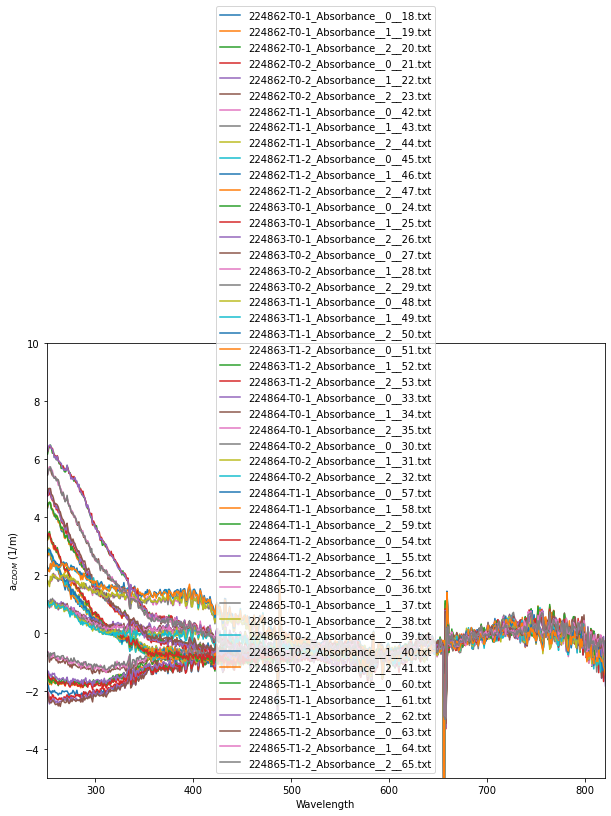

In [32]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-5,10)
ax.set_xlim(250,820)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

#plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 

df['wl'] = df.index
df

,224663-T0_Absorbance__0__00.txt,224663-T0_Absorbance__1__01.txt,224663-T0_Absorbance__2__02.txt,224663-T1_Absorbance__0__03.txt,224663-T1_Absorbance__1__04.txt,224663-T1_Absorbance__2__05.txt,224663-T2_Absorbance__0__06.txt,224663-T2_Absorbance__1__07.txt,224663-T2_Absorbance__2__08.txt,224663-T3_Absorbance__0__09.txt,...,224663-T6_Absorbance__0__18.txt,224663-T6_Absorbance__1__19.txt,224663-T6_Absorbance__2__20.txt,224663-T7_Absorbance__0__21.txt,224663-T7_Absorbance__1__22.txt,224663-T7_Absorbance__2__23.txt,224663-T8_Absorbance__0__24.txt,224663-T8_Absorbance__1__25.txt,224663-T8_Absorbance__2__26.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189.2794,37.79223,62.01979,-156.23552,-247.43432,-153.65616,-153.51798,13.74891,-0.00000,-0.00000,6.42537,...,14.18648,-35.42014,-126.96439,-0.00000,-0.00000,122.98020,94.74542,-0.00000,-0.00000,189.2794
189.6618,37.79223,62.01979,-156.23552,-247.43432,-153.65616,-153.51798,13.74891,-0.00000,-0.00000,6.42537,...,14.18648,-35.42014,-126.96439,-0.00000,-0.00000,122.98020,94.74542,-0.00000,-0.00000,189.6618
190.0441,37.79223,62.01979,-156.23552,-247.43432,-153.65616,-153.51798,13.74891,-0.00000,-0.00000,6.42537,...,14.18648,-35.42014,-126.96439,-0.00000,-0.00000,122.98020,94.74542,-0.00000,-0.00000,190.0441
190.4264,16.76584,-30.42263,15.31495,-0.00000,-123.90140,-0.00000,-80.48985,1.81937,-20.95730,24.08938,...,-7.87626,-48.47815,58.26590,-0.00000,-0.00000,84.58919,-58.31196,7.11627,-119.43358,190.4264
190.8087,-177.69948,32.63351,-46.38242,-167.75052,-0.00000,-0.00000,-0.00000,-62.94099,-0.00000,34.95954,...,-103.81924,-0.00000,-0.00000,213.39598,-0.00000,-0.00000,-112.87003,-0.00000,-230.16182,190.8087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,-0.92120,-2.32603,-1.42786,2.32603,1.45089,2.32603,2.00361,0.75999,0.64484,0.16121,...,-0.18424,0.59878,3.59268,-0.29939,-0.41454,-0.00000,0.43757,2.23391,1.33574,880.5978
880.8884,-2.37209,-0.99029,-1.51998,1.56604,-0.06909,2.07270,1.03635,1.08241,1.70422,-2.07270,...,0.09212,1.45089,0.82908,0.75999,1.03635,0.66787,-1.22059,-0.25333,0.13818,880.8884
881.1790,0.89817,0.23030,-0.13818,-1.12847,-1.01332,0.34545,-0.99029,-1.10544,-0.29939,0.11515,...,2.92481,1.26665,3.77692,-1.88846,-2.04967,-1.35877,3.08602,1.08241,0.75999,881.1790


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

THE FITS ARE GOOD, YAY!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 1000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (1, 10, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

THE FITS ARE GOOD, YAY!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

THE FITS ARE GOOD, YAY!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs 
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
224663-T0_Absorbance__0__00.txt,0.016907,0.005476,0.013180,5.285438,0.564000,3.918490,17.090152,9.983553,4.214440,-0.494304,-0.969453,19.299083,10.220055,4.052067,-0.381162,-0.845558,0.415474,0.143933,-2.064510
224663-T0_Absorbance__1__01.txt,0.016792,0.005561,0.015215,5.249902,0.577659,4.678528,16.941148,9.911748,4.183737,-0.522035,-1.000733,19.131931,10.149487,4.021791,-0.409737,-0.877011,0.365486,0.123470,-2.135401
224663-T0_Absorbance__2__02.txt,0.016891,0.004062,0.016108,5.279934,0.157840,5.006692,16.914079,9.876799,4.160890,-0.508757,-0.980503,19.102268,10.111967,4.000339,-0.396580,-0.857641,0.252160,0.031526,-4.011166
224663-T1_Absorbance__0__03.txt,0.014158,0.000019,0.011239,4.432158,0.004561,3.186290,21.503240,14.348642,7.989724,1.911269,1.168573,23.851086,14.667453,7.774837,2.022638,1.318418,0.001727,0.001431,-1.429831
224663-T1_Absorbance__1__04.txt,0.014170,0.000021,0.011354,4.436498,0.004664,3.228102,21.484866,14.328903,7.971298,1.898346,1.156935,23.834781,14.647967,7.756464,2.009597,1.306582,0.001881,0.001445,-3.049633
224663-T1_Absorbance__2__05.txt,0.014492,0.000017,0.011709,4.540884,0.004841,3.359509,21.953561,14.633845,8.199536,2.167134,1.446826,24.346890,14.948363,7.983592,2.281569,1.597095,0.001416,0.001441,-1.645576
224663-T2_Absorbance__0__06.txt,0.011012,0.000014,0.004311,3.392512,0.004356,0.603367,26.079800,18.551242,11.124438,2.577534,1.284694,28.610102,18.997430,10.847353,2.659486,1.452921,0.003137,0.007220,0.002688
224663-T2_Absorbance__1__07.txt,0.011014,0.000026,0.004719,3.392910,0.005196,0.759225,26.038262,18.509912,11.083842,2.538879,1.246518,28.566418,18.955205,10.806747,2.621092,1.414938,0.005447,0.006844,1.515665
224663-T2_Absorbance__2__08.txt,0.011078,0.000019,0.004084,3.415071,0.005087,0.520609,26.050220,18.496070,11.060398,2.537083,1.253509,28.587973,18.940679,10.782910,2.620575,1.422536,0.004554,0.009771,-0.028721
